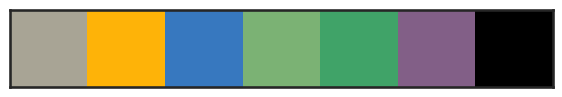

In [25]:
import sys
#import pandas as pd
#import numpy as np
#import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import itertools
import seaborn as sns

from utils import *
%load_ext autoreload
%autoreload 2

# from utils import make_erdos_renyi

sns.set(style="white", context="talk")
custom_palette = [ "greyish", "amber", "windows blue", "faded green", "greenish", 
                    "dusty purple","black" ] #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()

sns.palplot(current_palette)

%matplotlib inline

linestyles = ['-', '--', '-.', ':']

# Setup

In [26]:
legend = {'opt_max_dis': 'DS', 'opt_max_grad': 'CD', 'opt_max_fiedler_diff': 'FD', 'opt_random_add': 'Random'}

names = {'rd': 'Reddit', 'tw': 'Twitter', 'bg': 'Political Blogs',
         'er': 'Erdös-Rényi', 'sbm': 'Stochastic Block',
         'pa': 'Preferential Attachment'}

plt.rcParams.update({'font.size': 15, 'axes.linewidth': 1.5 })

colors = ["#ef476f",#"#ffd166",
          "#06d6a0","#118ab2","#073b4c"]


# Budget vs. Polarization


################
rd
Pol shape: ()
Dis shape: ()
pol = 0.0
dis = 0.0017343553667127215
pol_dis = 0.0017343553667127215
initial 0.0053
best 0.0
opt_random_add 0.0036
opt_max_dis 0.0006
opt_max_fiedler_diff 0.0013
opt_max_grad 0.0006


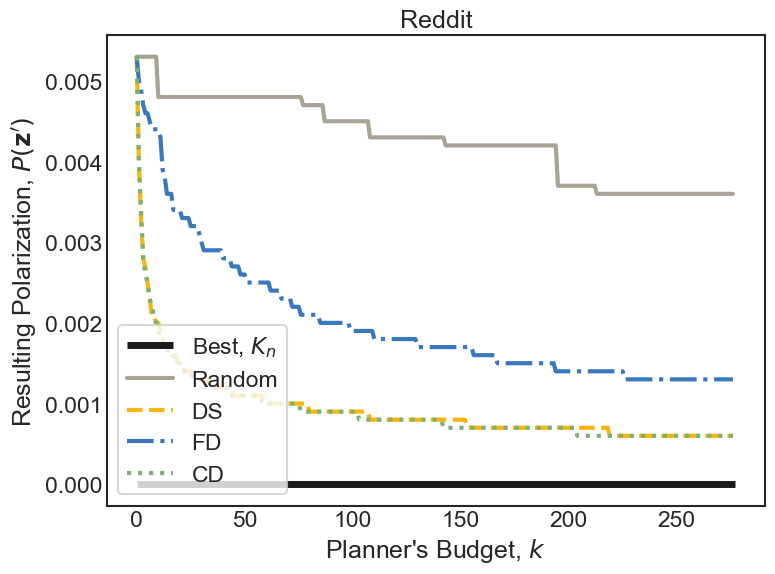

In [27]:
innate = False
log = False
names = {'rd': 'Reddit'} # for testing
for name in names.keys():
# for name in names.keys()[0]:
    print('\n################\n'+name)
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['pol_vec', 's'])

    # Remove column of poor-performing optimization heuristic
    df = df.loc[df.type != 'opt_max_grad_dis_ratio']

    
    f,ax = plt.subplots(figsize = (8,6))
    
    if log:
        plt.yscale('log')

    # K_n is ER graph 
    (K_n,_) = make_erdos_renyi(len(df.s[0]), 1, weighted = False)
    s = np.transpose(np.array([df.s[0]])) - np.mean(df.s[0])
    
    pol_K_n = get_measure(K_n,s,'pol')
    dis_K_n = get_measure(K_n,s,'dis')
    pol_dis_K_n = get_measure(K_n,s,'pol_dis')

    ax.hlines(y=pol_K_n, xmin = 0, xmax = len(df.pol_vec[0]),
              linestyle='-', linewidth = 5, color = 'k',
              label = 'Best, $K_n$')
    
    if innate:
        pol_K_0 = np.var(df.s.iloc[0])*len(df.s.iloc[0])

        ax.hlines(y=pol_K_0, xmin = 0, xmax = len(df.pol_vec[0]),
                  linestyle=':', linewidth = 3, color = 'g',
                  label = 'Innate Polarization')
    
    print('initial', df.pol_vec.iloc[0][0])
    print('best', pol_K_n)
    
    if innate:
        print('worst', pol_K_0)
        
    for i in range(len(df)):
        
        print(df.type.iloc[i], df.pol_vec.iloc[i][len(df.pol_vec.iloc[i])-1])
        
        plt.plot(df.pol_vec.iloc[i], linestyle = linestyles[i],
                 label = legend[df.type.iloc[i]], linewidth = 3)
#        plt.plot(np.array(df.pol_vec.iloc[i])/df.pol_vec.iloc[i][0],
#                 label = legend[df.type.iloc[i]], linewidth = 3)
        
    ax.tick_params(direction = 'in', width = 1.5)
    plt.title(f'{names[name]}')
    plt.legend(loc = 'lower left')
    plt.xlabel('Planner\'s Budget, $k$')
    plt.ylabel('Resulting Polarization, $P(\mathbf{z}\')$')
    plt.tight_layout()
    
#    plt.ylabel(r'Fraction of Remaining Polarization, $\frac{P(\mathbf{z}\')}{P(\mathbf{z})}$')
#    plt.title('Performance of Polarization-Minimizing Heuristics for '+names[name]+ ' Network',
#             position = (0.5,0.9))
    
    plt.savefig('fig/'+name+'_pol.pdf')

# Budget vs. Homophily


################
rd
initial -0.0041
complete -0.0018
opt_random_add -0.0079
opt_max_dis -0.1144
opt_max_fiedler_diff -0.0047
opt_max_grad -0.0743

################
tw
initial 0.019
complete -0.0018
opt_random_add 0.0124
opt_max_dis -0.1365
opt_max_fiedler_diff 0.0261
opt_max_grad -0.0873

################
bg
initial 0.8114
complete -0.0008
opt_random_add 0.7794
opt_max_dis 0.7474
opt_max_fiedler_diff 0.7803
opt_max_grad 0.7474

################
er
initial -0.015
complete -0.001
opt_random_add -0.0144
opt_max_dis -0.1135
opt_max_fiedler_diff -0.0117
opt_max_grad -0.1016

################
sbm
initial 0.6812
complete -0.001
opt_random_add 0.6555
opt_max_dis 0.6004
opt_max_fiedler_diff 0.6295
opt_max_grad 0.6123

################
pa
initial 0.0275
complete -0.001
opt_random_add 0.0308
opt_max_dis -0.1341
opt_max_fiedler_diff 0.0285
opt_max_grad -0.1106


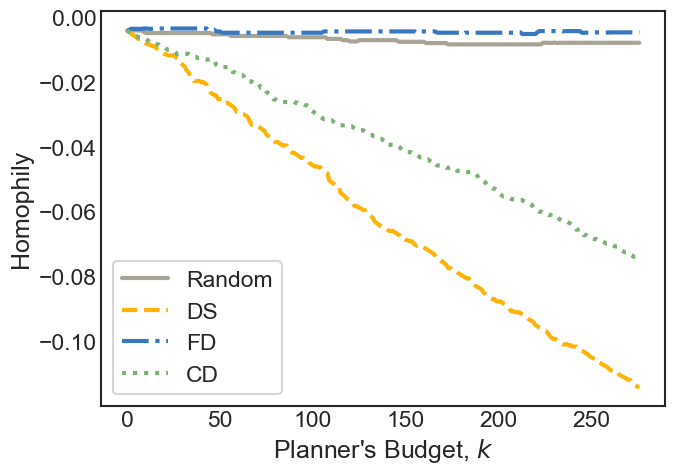

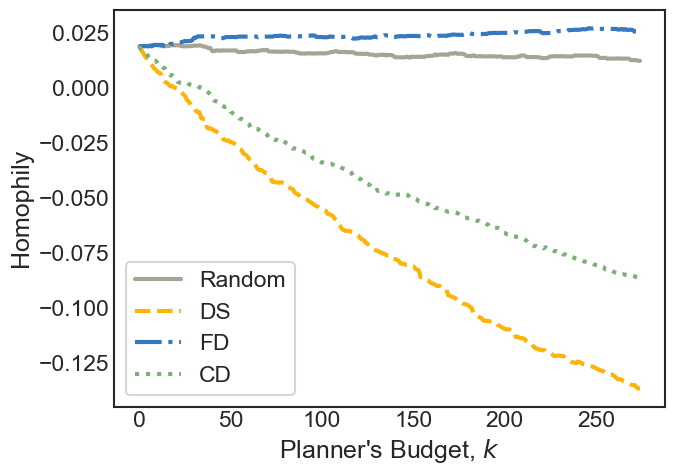

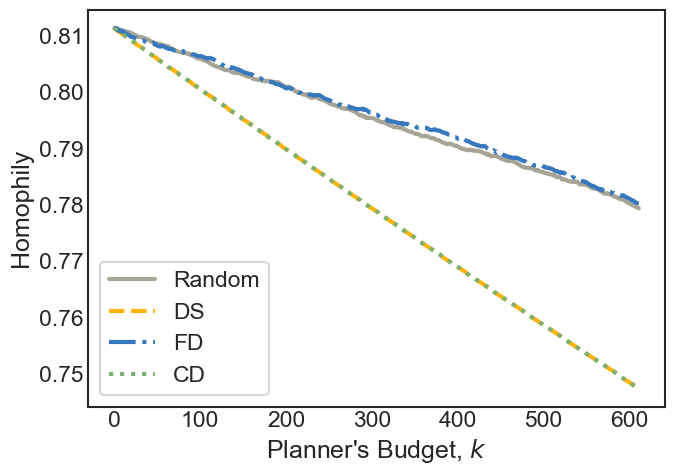

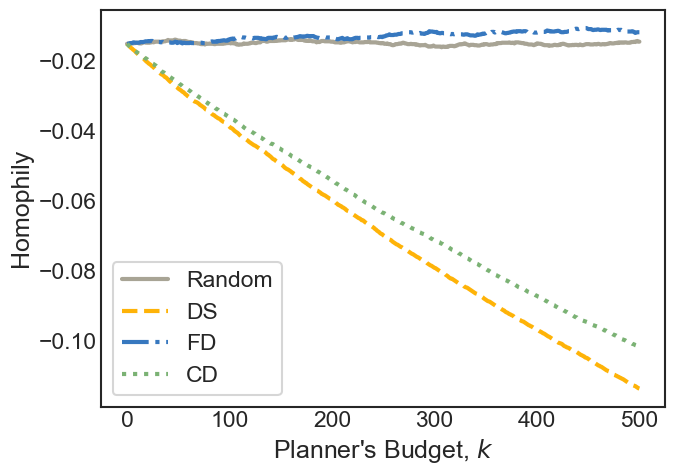

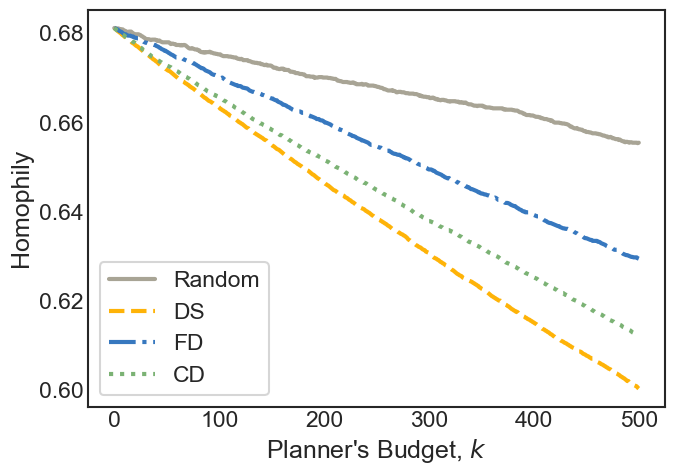

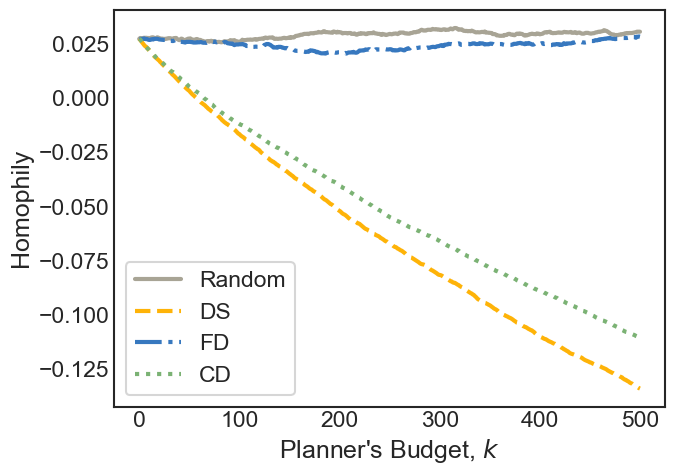

In [5]:
for name in names.keys():

    print('\n################\n'+name)
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['homophily_vec', 's'])

    
    f,ax = plt.subplots(figsize = (7,5))
    
    (K_n,_) = make_erdos_renyi(len(df.s[0]), 1, weighted = False)
    s = np.transpose(np.array([df.s[0]])) - np.mean(df.s[0])
    
    homophily_K_n = get_measure(K_n, s,'homophily')
   
    print('initial', df.homophily_vec.iloc[0][0])
    print('complete', homophily_K_n)
        
    for i in range(len(df)):
        
        print(df.type.iloc[i], df.homophily_vec.iloc[i][len(df.homophily_vec.iloc[i])-1])
        
        plt.plot(df.homophily_vec.iloc[i], linestyle = linestyles[i],
                 label = legend[df.type.iloc[i]], linewidth = 3)
        
    ax.tick_params(direction = 'in', width = 1.5)
    plt.legend(loc = 'lower left')
    plt.xlabel('Planner\'s Budget, $k$')
    plt.ylabel('Homophily')
    plt.tight_layout()
    
    plt.savefig('fig/'+name+'_homophily.pdf')

# Budget vs Spectral Gap


################
rd
initial 0.9598530847356013
complete 552.999999999994
opt_random_add 0.9769685709945055
opt_max_dis 0.9722730564054103
opt_max_fiedler_diff 9.170042459559099
opt_max_grad 2.8196311053547163

################
tw
initial 0.4392729351472333
complete 547.9999999999959
opt_random_add 0.6891130109596336
opt_max_dis 0.7921805322490516
opt_max_fiedler_diff 2.052021525544344
opt_max_grad 0.7992090519122936

################
bg
initial 0.16869150828362156
complete 1221.9999999999932
opt_random_add 0.2996361515925961
opt_max_dis 1.3927461401058085
opt_max_fiedler_diff 2.327383422504334
opt_max_grad 1.2578105404364912

################
er
initial 7.380770076026602
complete 999.999999999992
opt_random_add 8.182797443803196
opt_max_dis 7.439334953321195
opt_max_fiedler_diff 12.045878579288134
opt_max_grad 7.435071320972243

################
sbm
initial 4.576589351472428
complete 999.999999999992
opt_random_add 5.5101956981135665
opt_max_dis 6.671494504741851
opt_max_fiedler_diff 

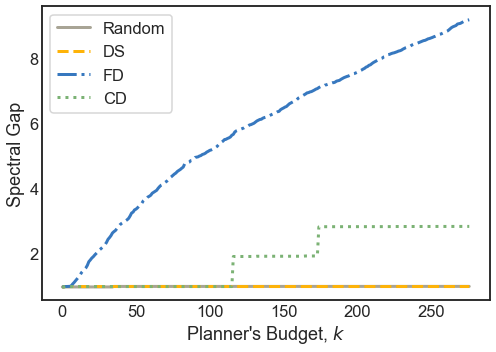

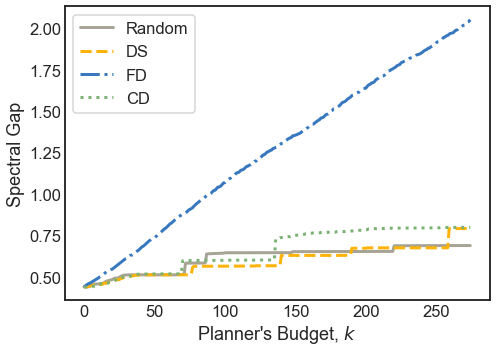

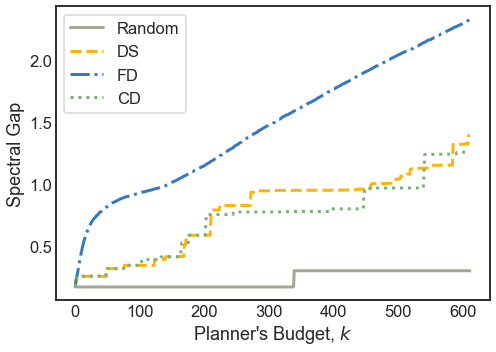

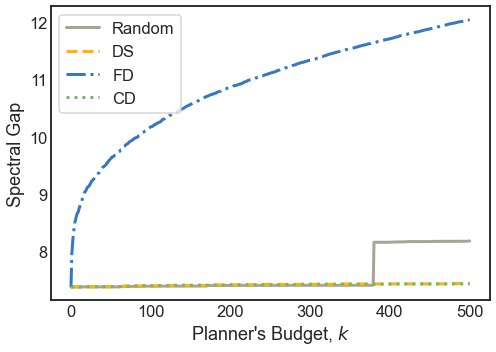

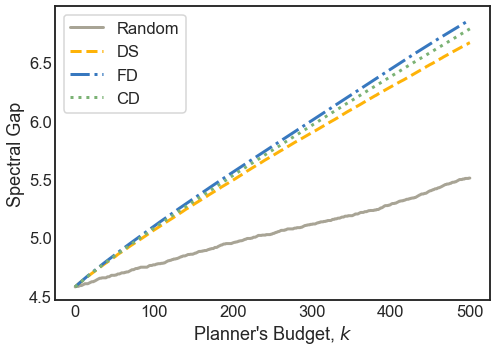

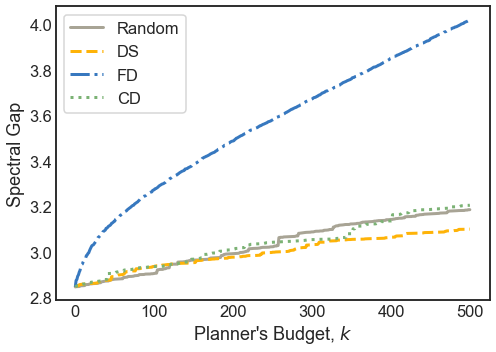

In [20]:
for name in names.keys():

    print('\n################\n'+name)
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['s_gap_vec', 's'])

    
    f,ax = plt.subplots(figsize = (7,5))
    
    (K_n,_) = make_erdos_renyi(len(df.s[0]), 1, weighted = False)
    s = np.transpose(np.array([df.s[0]])) - np.mean(df.s[0])
    
    s_gap_K_n = get_measure(K_n,s,'spectral_gap')
    
    print('initial', df.s_gap_vec.iloc[0][0])
    print('complete', s_gap_K_n)
    
        
    for i in range(len(df)):
        
        print(df.type.iloc[i], df.s_gap_vec.iloc[i][len(df.s_gap_vec.iloc[i])-1])
        
        plt.plot(df.s_gap_vec.iloc[i], linestyle = linestyles[i],
                 label = legend[df.type.iloc[i]], linewidth = 3)
        
    ax.tick_params(direction = 'in', width = 1.5)
    plt.legend(loc = 'upper left')
    plt.xlabel('Planner\'s Budget, $k$')
    plt.ylabel('Spectral Gap')
    plt.tight_layout()
    
    plt.savefig('fig/'+name+'_s_gap.pdf')

# Initial and Final Graphs

In [6]:
cmap = matplotlib.cm.get_cmap('RdBu')
#cmap = matplotlib.cm.get_cmap('cool')
edge_color = '#222222'
width = 0.2
node_size = 100

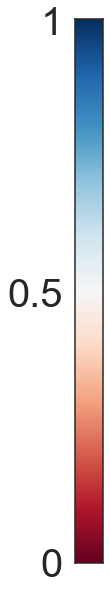

In [7]:
fig,ax = plt.subplots(figsize = (0.5,10))
gradient = np.flip(np.linspace(0, 1, 256))
gradient = np.vstack((gradient, gradient))
plt.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)
plt.gca().axes.get_xaxis().set_visible(False)
plt.yticks([0,128,255], [1,0.5,0], fontsize = 40)
plt.savefig('fig/colormap.pdf', bbox_inches='tight', pad_inches=0.1)


------------------------------
Graph: rd
n = 553
m = 8969
k = 276
Assortativity (Innate) Measurements:
       initial: -0.007
       opt_random_add: -0.005
       opt_max_dis: -0.142
       opt_max_fiedler_diff: -0.007
       opt_max_grad: -0.093
Expressed Polarization Measurements:
       initial: 0.0053
       opt_random_add: 0.0035
       opt_max_dis: 0.0006
       opt_max_fiedler_diff: 0.0013
       opt_max_grad: 0.0006
Spectral Gap Measurements:
       initial: 0.96
       opt_random_add: 0.977
       opt_max_dis: 0.972
       opt_max_fiedler_diff: 9.17
       opt_max_grad: 2.82

------------------------------
Graph: tw
n = 548
m = 3638
k = 274
Assortativity (Innate) Measurements:
       initial: 0.023
       opt_random_add: 0.018
       opt_max_dis: -0.143
       opt_max_fiedler_diff: 0.029
       opt_max_grad: -0.09
Expressed Polarization Measurements:
       initial: 0.1664
       opt_random_add: 0.1011
       opt_max_dis: 0.0221
       opt_max_fiedler_diff: 0.0754
       opt_

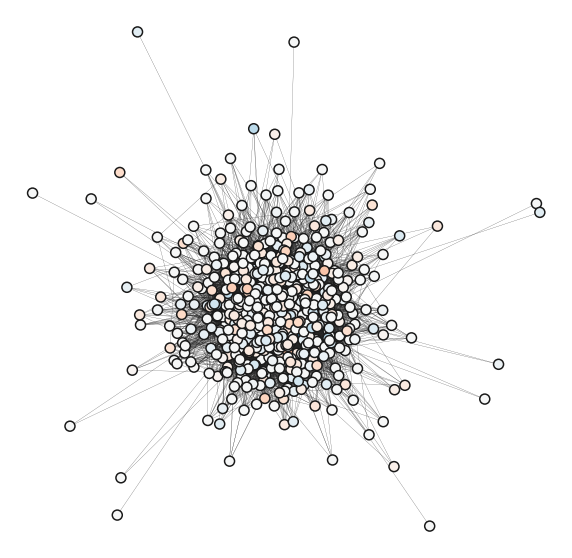

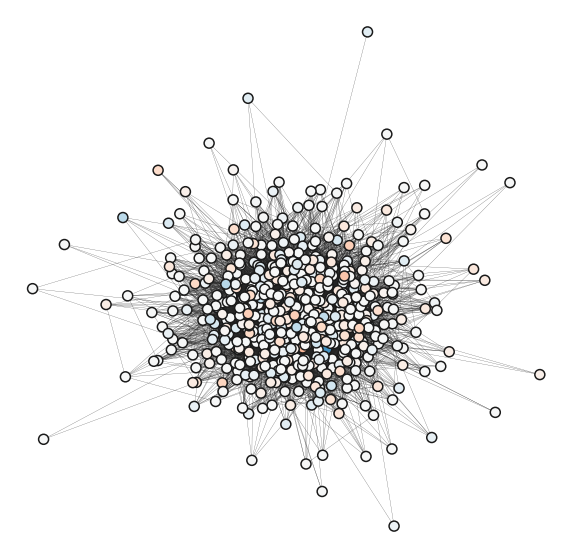

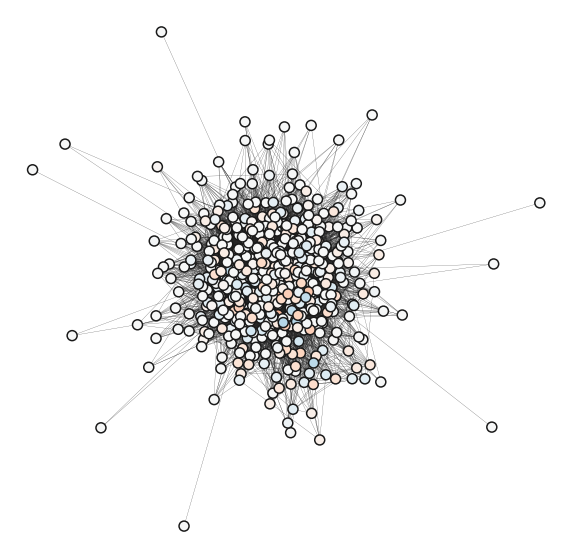

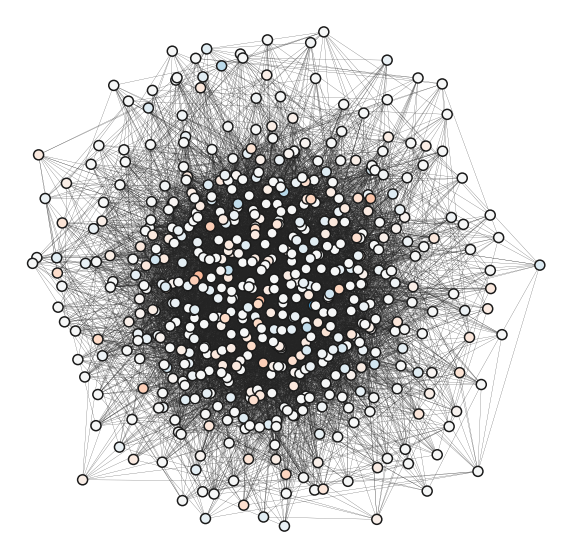

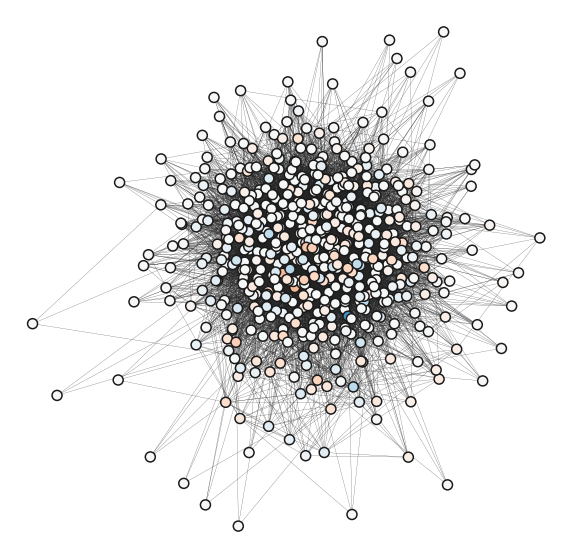

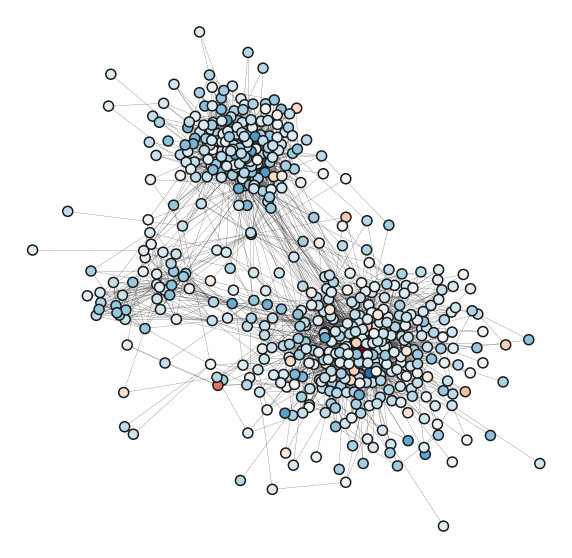

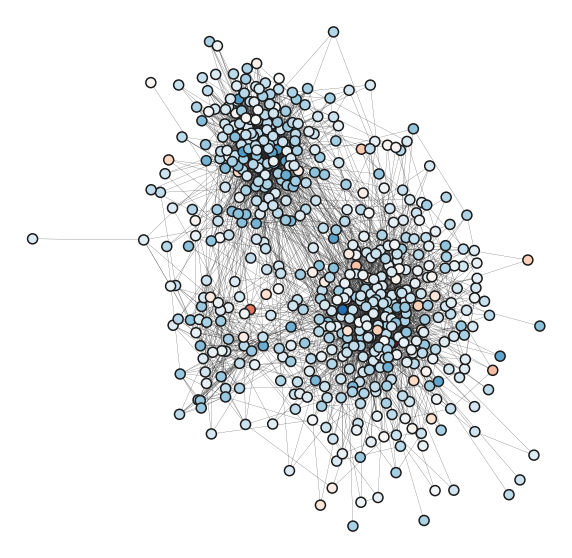

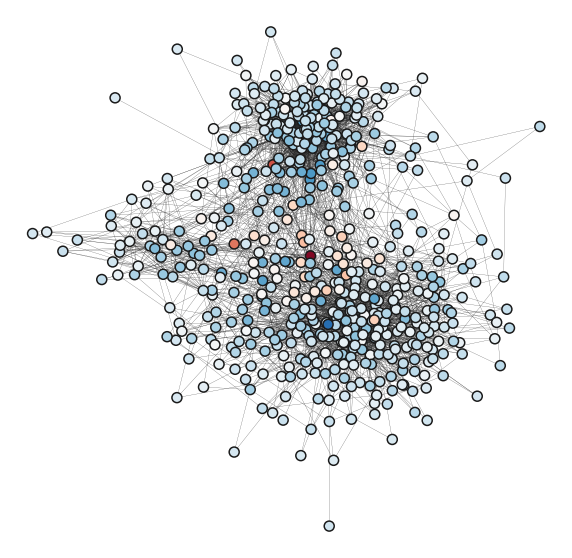

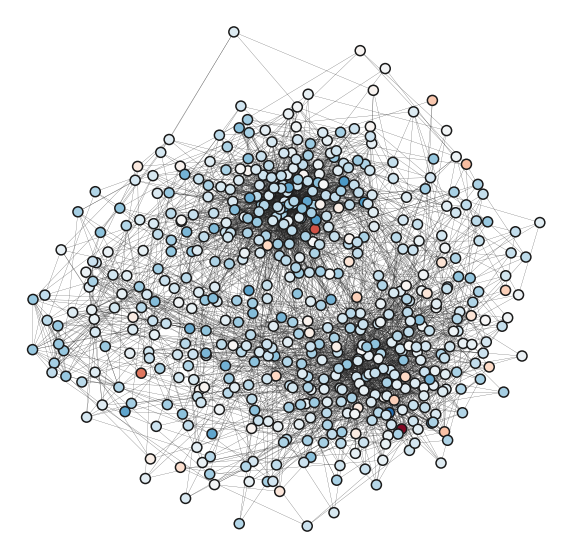

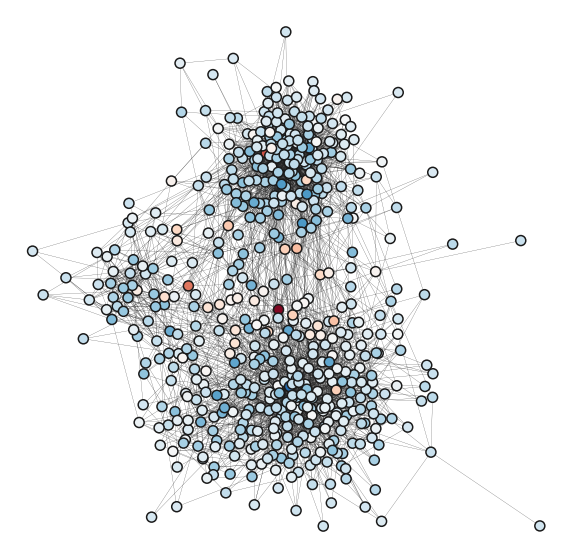

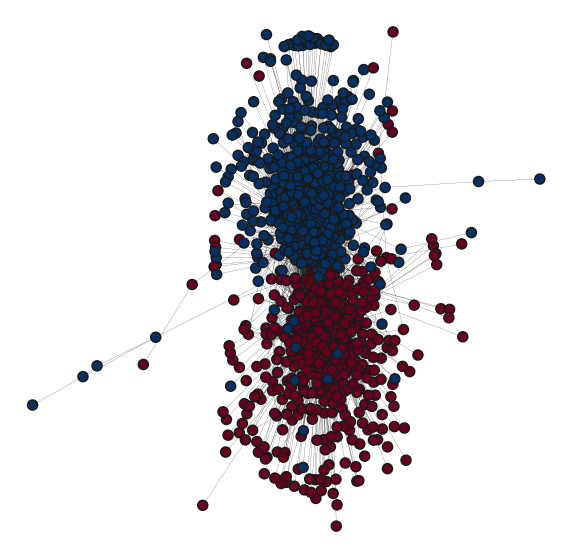

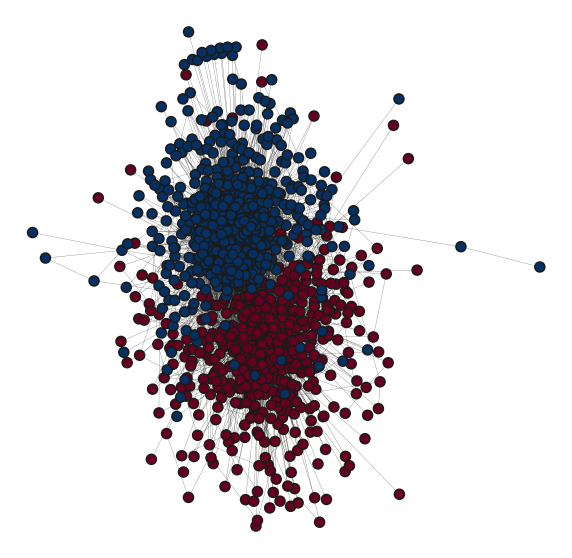

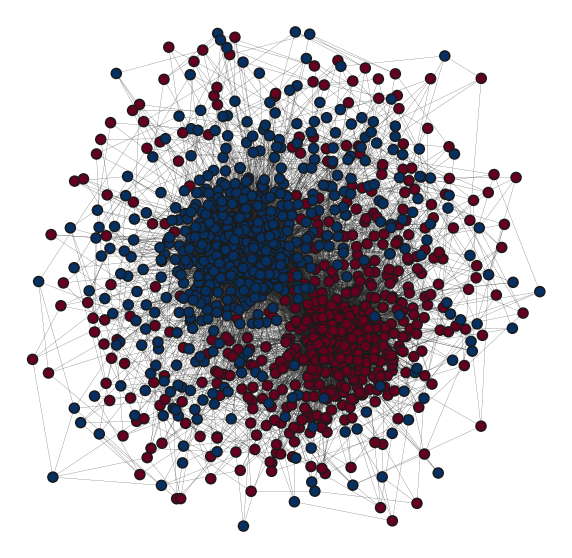

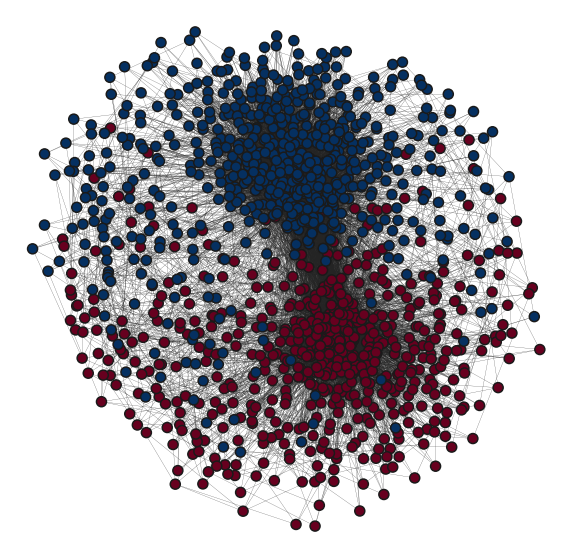

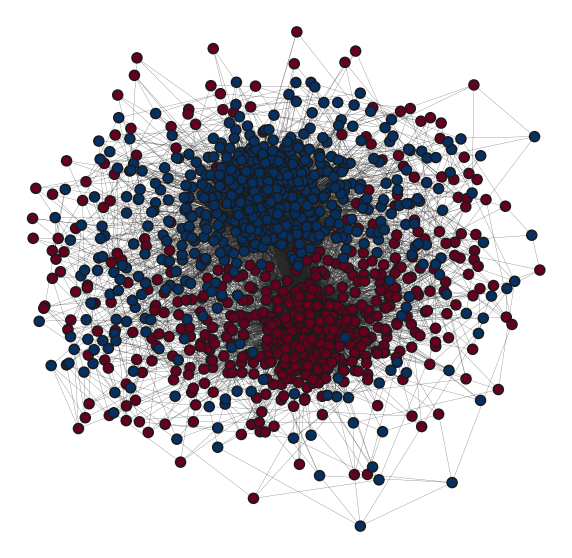

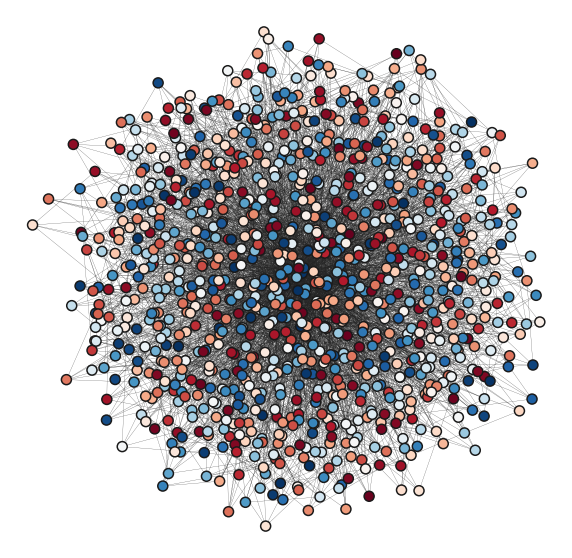

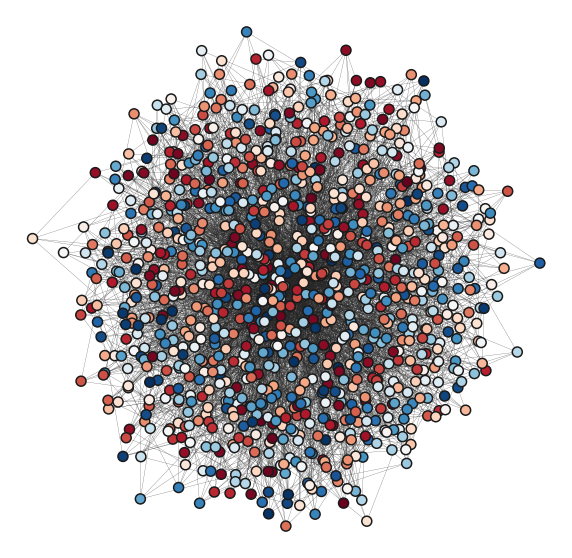

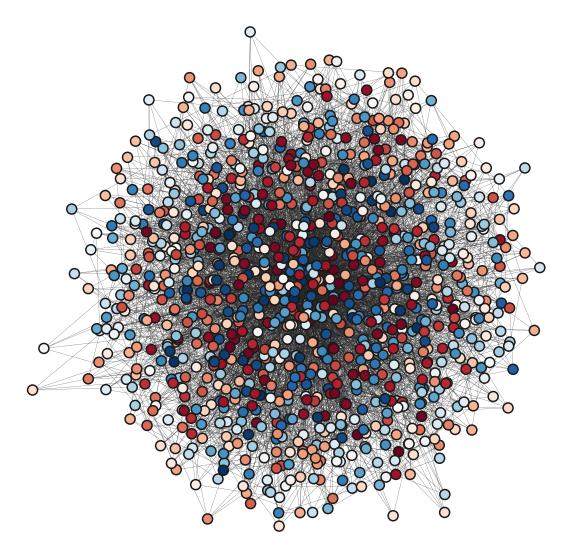

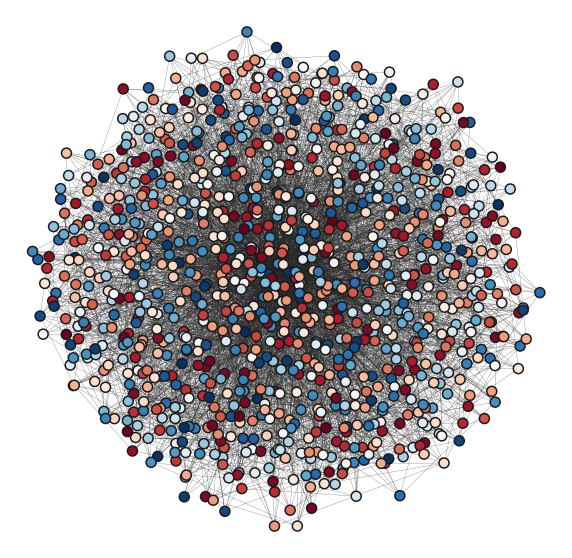

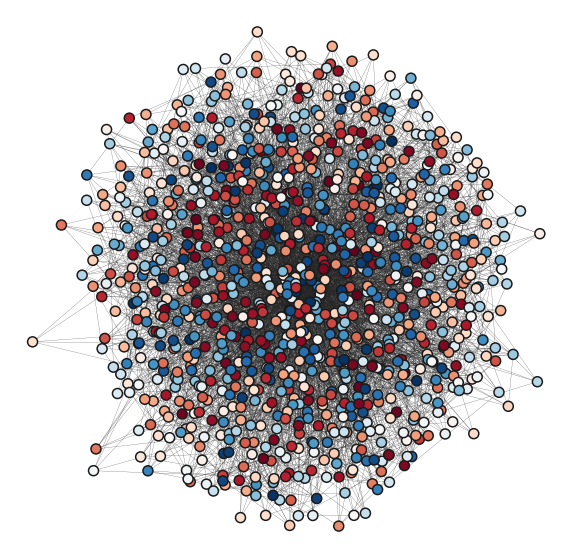

In [8]:
savefig = True
plot = True

for name in names.keys():
    print('\n------------------------------')
    print('Graph: '+name)
    
    assort_innate = dict()
    assort_expr = dict()
    avg_innate_dis = dict()
    avg_expr_dis = dict()
    expr_dis = dict()
    expr_pol = dict()
    spectral_gap = dict()

    
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['s', 'G_in', 'G_out'])
    
    G_0 = nx.from_numpy_matrix(np.array(df.G_in.iloc[0]))
    
    s = df.s.iloc[0]
    s_dict = dict(zip(np.arange(len(s)),[int(round(item*1000)) for item in s]))
    
    z = np.array(get_expressed(G_0,s)).squeeze().tolist()
    z_dict = dict(zip(np.arange(len(z)),[int(round(item*1000)) for item in z]))
    
    nx.set_node_attributes(G_0, s_dict, "innate")
    nx.set_node_attributes(G_0, z_dict, "expressed")

    
    assort_innate['initial'] = str(round(nx.numeric_assortativity_coefficient(G_0,'innate'),3))
    assort_expr['initial'] = str(round(nx.numeric_assortativity_coefficient(G_0,'expressed'),3))
    avg_innate_dis['initial'] = str(round(get_measure(G_0,s,'innate_dis')/len(G_0.edges()),3))
    avg_expr_dis['initial'] = str(round(get_measure(G_0,s,'dis')/len(G_0.edges()),8))
    expr_dis['initial'] = str(round(get_measure(G_0,s,'dis'),3))
    expr_pol['initial'] = str(round(get_measure(G_0,s,'pol'),5))
    spectral_gap['initial'] = str(round(get_measure(G_0,s,'spectral_gap'),3))

    
    print('n = '+str(len(G_0.nodes())))
    print('m = '+str(len(G_0.edges())))

    

    if plot:
        f,ax = plt.subplots(figsize = (10,10))
        ax.axis('off')
        nx.draw_networkx(G_0, pos = nx.spring_layout(G_0, seed = 0), 
                         node_color = s, vmax = 1, vmin = 0, cmap = cmap, edge_color = edge_color,
                         width = width, node_size = node_size, with_labels = False, edgecolors = 'k')

        if savefig:
            #plt.savefig('fig/'+name+'_G_in.pdf')
            plt.savefig('fig/'+name+'_G_in.png', dpi = 200)




    for i in range(len(df)):
        G_tmp = nx.from_numpy_matrix(np.array(df.G_out.iloc[i]))
        
        if i == 0:
            print('k = '+str(len(G_tmp.edges()) - len(G_0.edges())))

        
        z_tmp = np.array(get_expressed(G_tmp,s)).squeeze().tolist()
        z_dict_tmp = dict(zip(np.arange(len(z_tmp)),[int(round(item*1000)) for item in z_tmp]))
        
        nx.set_node_attributes(G_tmp, s_dict, "innate")
        nx.set_node_attributes(G_tmp, z_dict, "expressed")

        assort_innate[df.type.iloc[i]] = str(round(nx.numeric_assortativity_coefficient(G_tmp,'innate'),3))
        assort_expr[df.type.iloc[i]] = str(round(nx.numeric_assortativity_coefficient(G_tmp,'expressed'),3))
        avg_innate_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'innate_dis')/len(G_tmp.edges()),3))
        avg_expr_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'dis')/len(G_tmp.edges()),8))
        expr_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'dis'),3))
        expr_pol[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'pol'),5))
        spectral_gap[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'spectral_gap'),3))




        if plot:
            f,ax = plt.subplots(figsize = (10,10))
            ax.axis('off')
            nx.draw_networkx(G_tmp, pos = nx.spring_layout(G_tmp, seed = 0), 
                         node_color = s, vmax = 1, vmin = 0, cmap = cmap, edge_color = edge_color,
                         width = width, node_size = node_size, with_labels = False, edgecolors = 'k')

            if savefig:
                plt.savefig('fig/'+name+'_G_out_'+df.type.iloc[i]+'.png', dpi = 200)
    
    
    
    print('Assortativity (Innate) Measurements:')
    for key in assort_innate:
        print('       '+key+': '+assort_innate[key])
    
    '''
    print('Assortativity (Expressed) Measurements:')
    for key in assort_expr:
        print('       '+key+': '+assort_expr[key])
    '''
    
    '''
    print('Avg. Innate Disagreement Measurements:')
    for key in avg_innate_dis:
        print('       '+key+': '+avg_innate_dis[key])
    '''
    
    '''
    print('Avg. Expressed Disagreement Measurements:')
    for key in avg_expr_dis:
        print('       '+key+': '+avg_expr_dis[key])
    '''
    
    '''
    print('Expressed Disagreement Measurements:')
    for key in expr_dis:
        print('       '+key+': '+expr_dis[key])
    '''

    print('Expressed Polarization Measurements:')
    for key in expr_pol:
        print('       '+key+': '+expr_pol[key])
        
    print('Spectral Gap Measurements:')
    for key in spectral_gap:
        print('       '+key+': '+spectral_gap[key])
        